In [12]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
 

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import numpy as np
import pandas as pd
from helper import TelecomHelper
import plots


In [15]:
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.6f}".format

In [16]:
CSV_PATH = "../data/cleaned_data.csv"

In [17]:
TelecomHelper = TelecomHelper()

In [18]:
df = TelecomHelper.read_csv(csv_path=CSV_PATH)

file read as csv


In [19]:
print(f"The percentage of data missing is: {TelecomHelper.percent_missing(df)}")

The percentage of data missing is: 0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   dur._(ms)                                 146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn/number                             146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

In [21]:
renamed_df = df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [22]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   duration                                  146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn                                    146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

In [23]:
agg_by_session_count = renamed_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['bearer_id'], ascending = False)
session_freq_metrics.head(10)

,bearer_id
msisdn,
33626320676.000000,18
33614892860.000000,17
33625779332.000000,17
33659725664.000000,16
33675877202.000000,15
33760536639.000000,15
33667163239.000000,13
33603127838.000000,12
33760413819.000000,12


In [24]:
agg_by_duration = renamed_df.groupby('msisdn').agg({'duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['duration'], ascending = False)
duration_metrics.head(10)

,duration
msisdn,
33625779332.000000,18553754.000000
33614892860.000000,9966898.000000
33760536639.000000,9279434.000000
33626320676.000000,8791927.000000
33667163239.000000,8744914.000000
33664693736.000000,6288730.000000
33603127838.000000,6287761.000000
33667456716.000000,5649882.000000
33760413819.000000,5321667.000000


In [25]:
agg_by_data = renamed_df.groupby('msisdn').agg({'total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['total_data'], ascending = False)
traffic_metric.head(10)

,total_data
msisdn,
33614892860.000000,8846226494.000000
33760536639.000000,8514773963.000000
33625779332.000000,8499620722.000000
33626320676.000000,7971167261.000000
33675877202.000000,7891110608.000000
33659725664.000000,7705862783.000000
33666464084.000000,7308500938.000000
33760413819.000000,7132370514.000000
33664712899.000000,6872018208.000000


In [26]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)
    

In [27]:

engagment_metrics = renamed_df.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagment_metrics = engagment_metrics.rename(columns={'bearer_id': 'sessions_frequency', 'total_data': 'total_traffic'})
engagment_metrics.sort_values(by=['sessions_frequency'], ascending=False).head(10)



,sessions_frequency,duration,total_traffic
msisdn,,,
33626320676.000000,18,8791927.000000,7971167261.000000
33614892860.000000,17,9966898.000000,8846226494.000000
33625779332.000000,17,18553754.000000,8499620722.000000
33659725664.000000,16,4035428.000000,7705862783.000000
33675877202.000000,15,4865947.000000,7891110608.000000
33760536639.000000,15,9279434.000000,8514773963.000000
33667163239.000000,13,8744914.000000,5618394054.000000
33603127838.000000,12,6287761.000000,4976195043.000000
33760413819.000000,12,5321667.000000,7132370514.000000


In [28]:
engagment_metrics.describe()


,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,1.389447,146211.393988,688866059.424815
std,0.796173,184539.076531,486996435.345276
min,1.000000,7142.000000,33249009.000000
25%,1.000000,72729.000000,357950085.000000
50%,1.000000,103111.000000,616933544.000000
75%,2.000000,172799.000000,856473809.500000
max,18.000000,18553754.000000,8846226494.000000


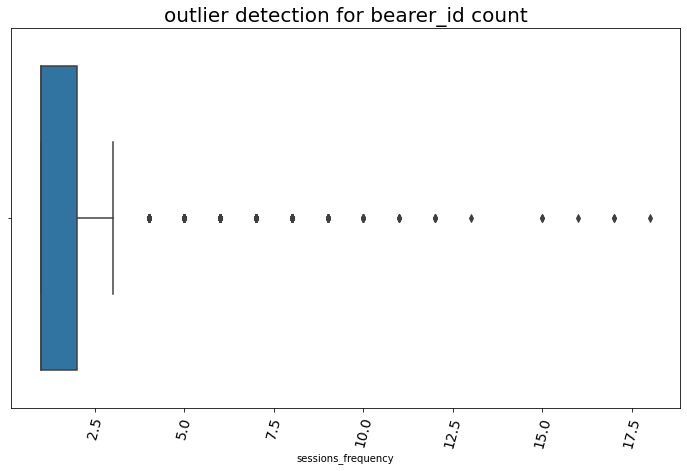

In [29]:
plots.plot_box(engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count')

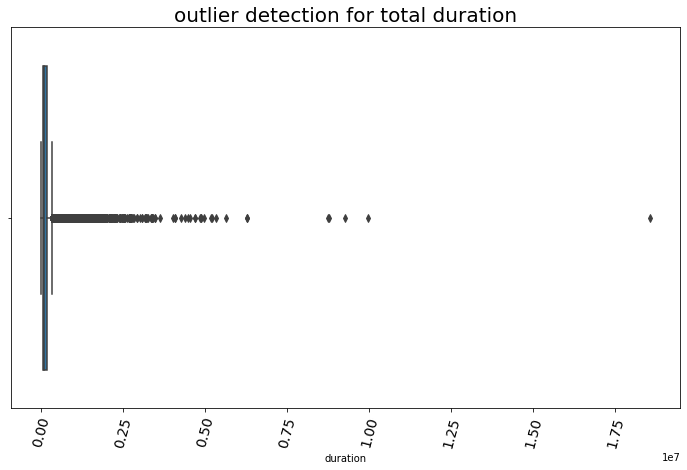

In [30]:
plots.plot_box(engagment_metrics, 'duration', 'outlier detection for total duration')

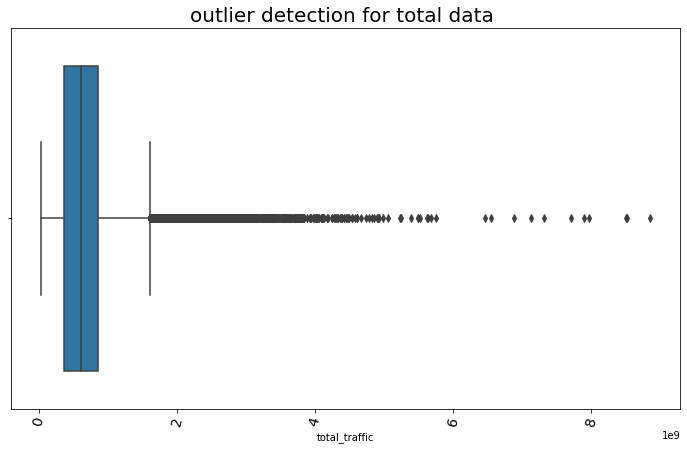

In [31]:
plots.plot_box(engagment_metrics, 'total_traffic', 'outlier detection for total data ')

In [32]:
def handle_outliers(df, col):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df



In [33]:

cleaned_engagment_metrics = handle_outliers(engagment_metrics, 'sessions_frequency')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'duration')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'total_traffic')
cleaned_engagment_metrics.describe()


,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,1.356634,130349.580378,662283010.076524
std,0.650007,87018.309018,394711651.731353
min,1.000000,7142.000000,33249009.000000
25%,1.000000,72729.000000,357950085.000000
50%,1.000000,103111.000000,616933544.000000
75%,2.000000,172799.000000,856473809.500000
max,3.500000,322904.000000,1604259396.250000


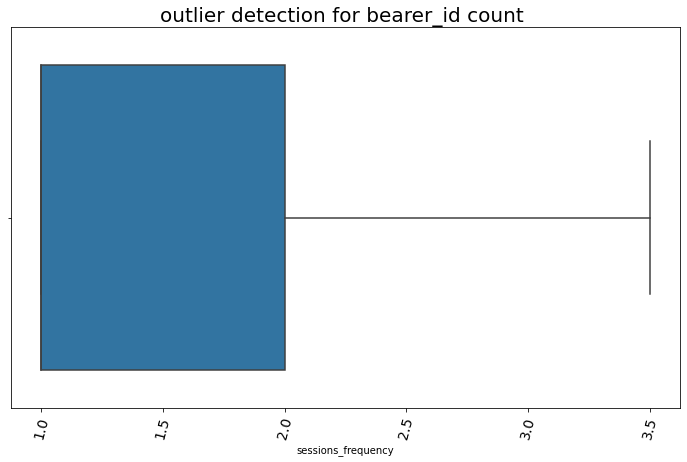

In [34]:
plots.plot_box(cleaned_engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count ')


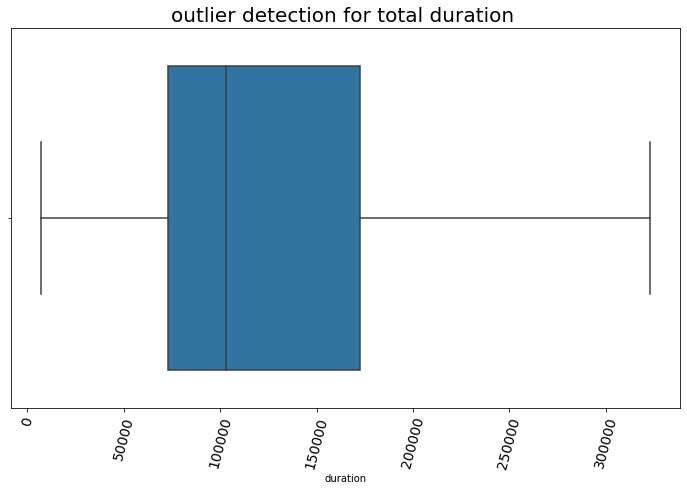

In [35]:
plots.plot_box(cleaned_engagment_metrics, 'duration', 'outlier detection for total duration ')


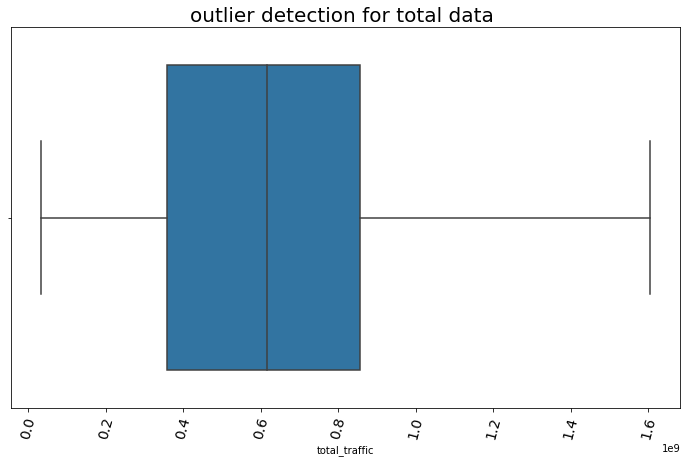

In [36]:
plots.plot_box(cleaned_engagment_metrics, 'total_traffic', 'outlier detection for total data ')


In [37]:

normalized_metrics = scale_and_normalize(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])
normalized_metrics.describe()


,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,0.130161,0.615899,0.654168
std,0.221570,0.260170,0.242921
min,0.000000,0.000000,0.000000
25%,0.000000,0.447434,0.496042
50%,0.000000,0.637558,0.680414
75%,0.327139,0.830555,0.855126
max,0.963529,1.000000,1.000000


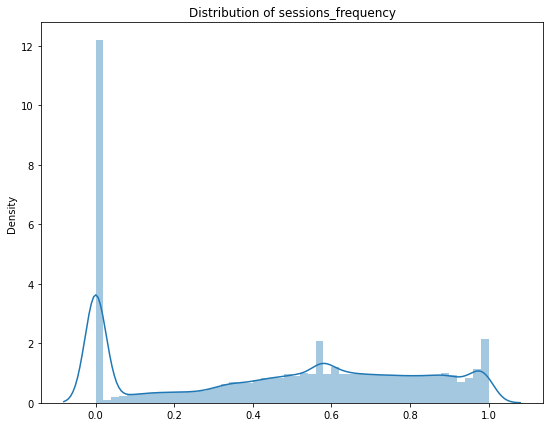

In [38]:
plots.plot_dist(normalized_metrics, 'sessions_frequency',)

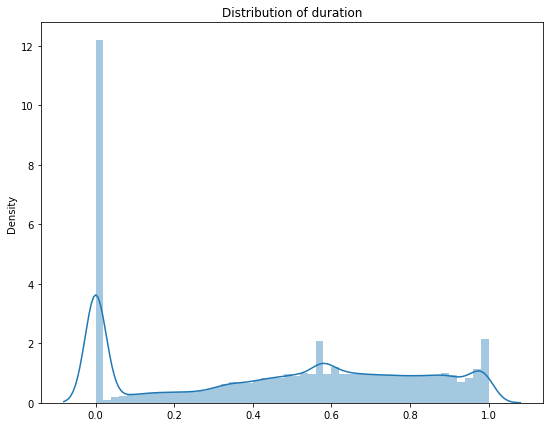

In [39]:
plots.plot_dist(normalized_metrics, 'duration',)

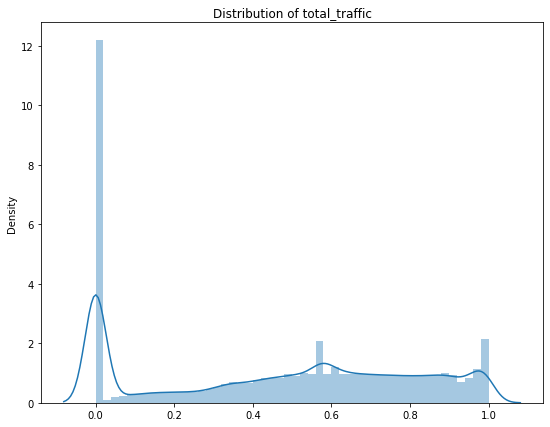

In [40]:
plots.plot_dist(normalized_metrics, 'total_traffic',)

In [41]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster['clusters'] = pred


In [42]:
def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)
    

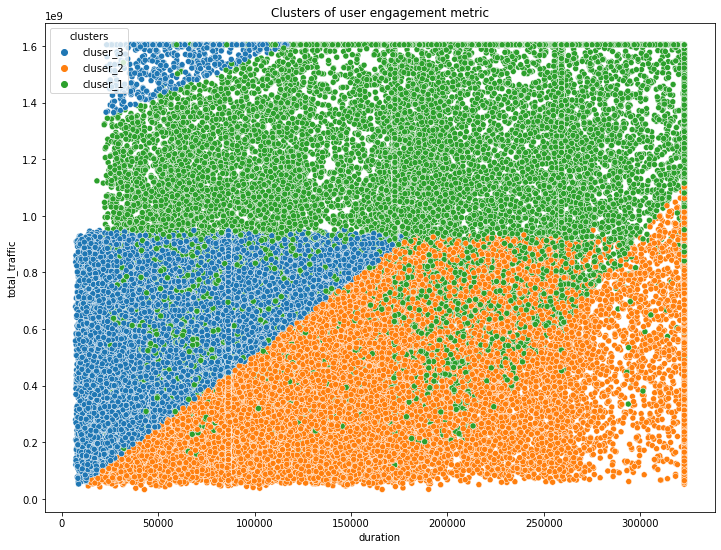

cluser_2    40412
cluser_3    39540
cluser_1    25767
Name: clusters, dtype: int64

In [48]:

labels = ['cluser_1', 'cluser_2', 'cluser_3']

engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
                                                                                             cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()

plt.figure(figsize=(12,9))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster).set_title('Clusters of user engagement metric')

plt.show()
# engagment_metrics_with_cluster.describe()
engagment_metrics_with_cluster['clusters'].value_counts()


In [49]:
# engagment_metrics_with_cluster.groupby('duration').agg()

In [50]:

print("Describing cluser 1 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 'cluser_1']
cluser_1.describe()


Describing cluser 1 


,sessions_frequency,duration,total_traffic
count,25767.000000,25767.000000,25767.000000
mean,2.350293,199931.880661,1132081565.172750
std,0.564901,91547.771734,367995061.649343
min,2.000000,18235.000000,119768539.000000
25%,2.000000,124737.000000,862063143.000000
50%,2.000000,188654.000000,1142455353.000000
75%,3.000000,286625.000000,1476063050.000000
max,3.500000,322904.000000,1604259396.250000


In [51]:
print("Describing cluser 2 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 'cluser_2']
cluser_1.describe()

Describing cluser 2 


,sessions_frequency,duration,total_traffic
count,40412.000000,40412.000000,40412.000000
mean,1.057681,150169.927249,385914343.165025
std,0.233142,73440.195065,227393576.595976
min,1.000000,13755.000000,33249009.000000
25%,1.000000,87368.750000,199774634.750000
50%,1.000000,137839.500000,343760115.000000
75%,1.000000,178435.750000,535246879.000000
max,2.000000,322904.000000,1114005888.000000


In [52]:
print("Describing cluser 3 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 'cluser_3']
cluser_1.describe()

Describing cluser 3 


,sessions_frequency,duration,total_traffic
count,39540.000000,39540.000000,39540.000000
mean,1.014643,64747.481512,638593359.041192
std,0.120122,37573.209387,230234211.480416
min,1.000000,7142.000000,52870808.000000
25%,1.000000,29707.750000,493939867.250000
50%,1.000000,64943.000000,657934341.000000
75%,1.000000,86400.000000,799563669.750000
max,2.000000,179121.000000,1604259396.250000


Now let's save the engagement metrics

In [66]:
TelecomHelper.save_csv(engagment_metrics_with_cluster, "../data/user_engagement.csv")

File Successfully Saved.!!!


,sessions_frequency,duration,total_traffic,clusters
msisdn,,,,
33601001722.000000,1.000000,116720.000000,878690574.000000,cluser_3
33601001754.000000,1.000000,181230.000000,156859643.000000,cluser_2
33601002511.000000,1.000000,134969.000000,595966483.000000,cluser_2
33601007832.000000,1.000000,49878.000000,422320698.000000,cluser_3
33601008617.000000,2.000000,37104.000000,1457410944.000000,cluser_3
...,...,...,...,...
33789967113.000000,1.000000,160461.000000,208123067.000000,cluser_2
33789980299.000000,2.000000,210389.000000,1094693386.000000,cluser_1
33789996170.000000,1.000000,8810.000000,714641641.000000,cluser_3


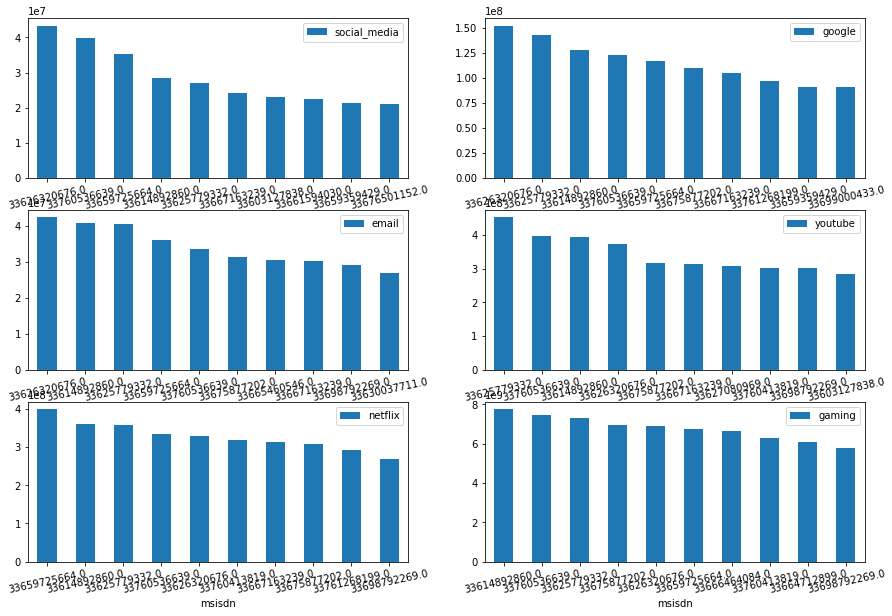

In [53]:

app_metrics = []

app_columns = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming']

app_metrics = renamed_df.groupby('msisdn').agg({'social_media': 'sum',
                                        'google': 'sum',
                                        'email': 'sum',
                                        'youtube': 'sum',
                                        'netflix': 'sum', 
                                        'gaming': 'sum'})



figure, axes = plt.subplots(3, 2, figsize=(15,10))

count = 0
for app_metric in app_metrics:
    
    x = app_metrics[[app_metric]].sort_values(by = [app_metric], ascending=False).head(10)
    x.plot.bar(y=app_metric, ax=axes[(count//2), count%2], rot=12)
    count += 1




In [54]:

app_total_df = pd.DataFrame(columns=['app', 'total'])
app_total_df['app'] = app_columns

app_metrics
app_totals = [ ]
for app in app_columns:
    app_totals.append(app_metrics.sum()[app])
app_total_df['total'] =app_totals
    
app_total_df


,app,total
0,social_media,268478589410.000000
1,google,1146921653914.000000
2,email,331838236748.000000
3,youtube,3325904550858.000000
4,netflix,3324049323727.000000
5,gaming,63215294882199.000000


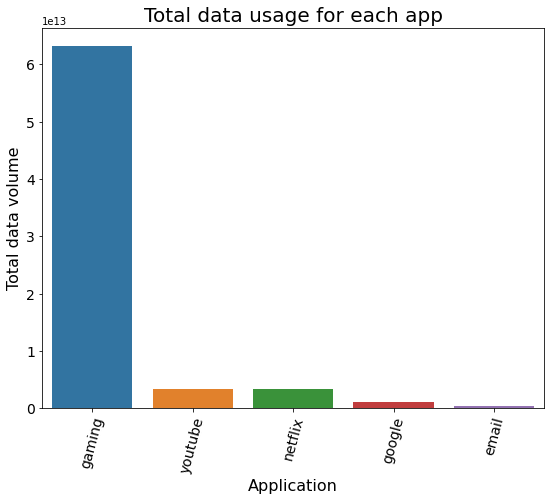

In [55]:

plots.plot_bar(app_total_df.sort_values(by=['total'],
                                  ascending = False).head(),
         x_col='app', y_col='total', title="Total data usage for each app",
         xlabel="Application", ylabel="Total data volume")


In [56]:
cleaned_engagment_metrics

,sessions_frequency,duration,total_traffic
msisdn,,,
33601001722.000000,1.000000,116720.000000,878690574.000000
33601001754.000000,1.000000,181230.000000,156859643.000000
33601002511.000000,1.000000,134969.000000,595966483.000000
33601007832.000000,1.000000,49878.000000,422320698.000000
33601008617.000000,2.000000,37104.000000,1457410944.000000
...,...,...,...
33789967113.000000,1.000000,160461.000000,208123067.000000
33789980299.000000,2.000000,210389.000000,1094693386.000000
33789996170.000000,1.000000,8810.000000,714641641.000000


In [57]:

inertias = []
for k in range(1, 20):
    
    kmeans = KMeans(n_clusters=k).fit(normalized_metrics)
    inertias.append([k, kmeans.inertia_])

    



Text(0, 0.5, 'Inertia')

<Figure size 720x504 with 0 Axes>

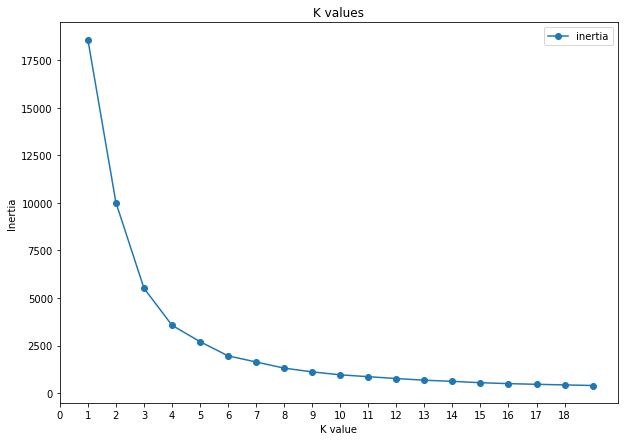

In [58]:

k_df = pd.DataFrame(columns=['k', 'inertia'])
k_df['k'] = [i[0] for i in inertias]
k_df['inertia'] = [i[1] for i in inertias]


plt.figure(figsize=(10,7))

k_df.plot( x='k', y='inertia', linestyle='-',
          marker='o', figsize=(10,7), title='K values').set_xlabel("K values")
plt.xticks(np.arange(len(k_df.index)))
plt.xlabel('K value')
plt.ylabel('Inertia')


# k_df.plot(inertias, linestyle='-', marker='o', )


#### As you can see the elblow is b/n 3 and 4
#### i choose 4 as for k value

In [59]:
kmeans = KMeans(n_clusters=4, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster2 = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster2['clusters'] = pred




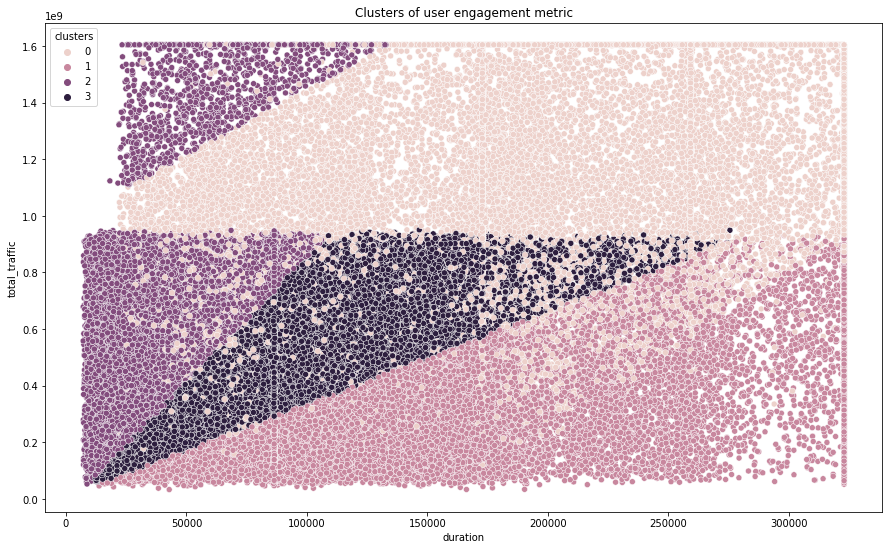

,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,105719.000000
mean,1.356634,130349.580378,662283010.076524
std,0.650007,87018.309018,394711651.731353
min,1.000000,7142.000000,33249009.000000
25%,1.000000,72729.000000,357950085.000000
50%,1.000000,103111.000000,616933544.000000
75%,2.000000,172799.000000,856473809.500000
max,3.500000,322904.000000,1604259396.250000


In [60]:
labels = ['cluser_1', 'cluser_2', 'cluser_3', 'cluser_4']

engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
                                                                                             cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()
plt.figure(figsize=(15,9))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster2).set_title('Clusters of user engagement metric')

plt.show()
engagment_metrics_with_cluster.describe()